Bi-Polar Step Converged after 1000 epochs
Sigmoid Converged after 1000 epochs
ReLU Converged after 1000 epochs


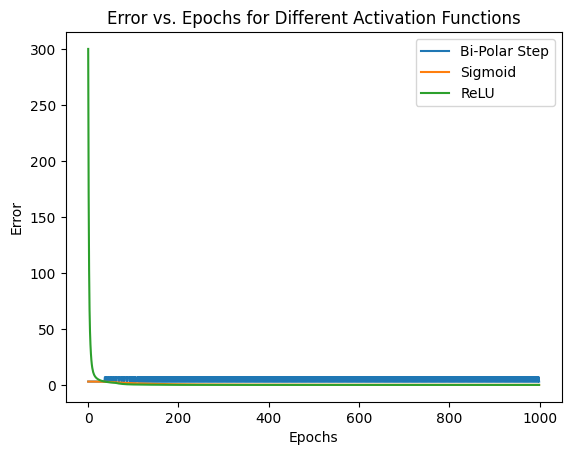

Final Weights for Bi-Polar Step:
W0: -0.9997282892807622
W1: 0.9998163407650911
W2: 0.9998112673815553
Final Weights for Sigmoid:
W0: -0.9997282892807622
W1: 0.9998163407650911
W2: 0.9998112673815553
Final Weights for ReLU:
W0: -0.9997282892807622
W1: 0.9998163407650911
W2: 0.9998112673815553


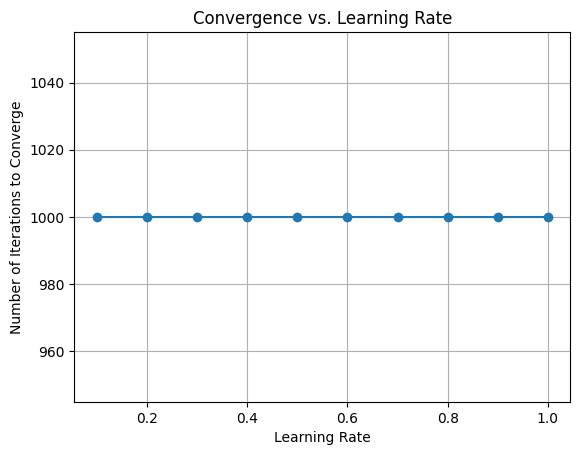

Converged after 252 epochs


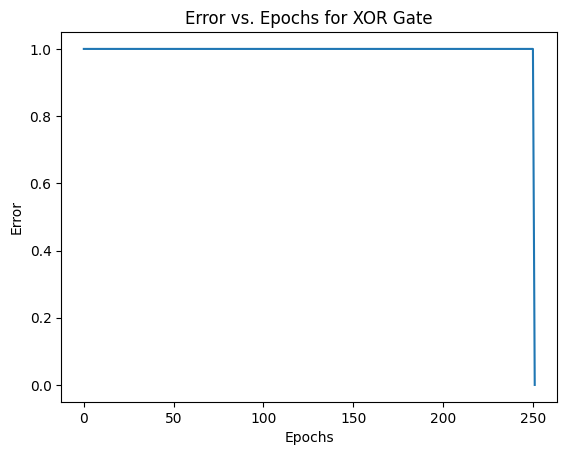

Final Weights:
W0: -750.95
W1: 749.2
W2: 499.25
Converged after 1 epochs (Updated)


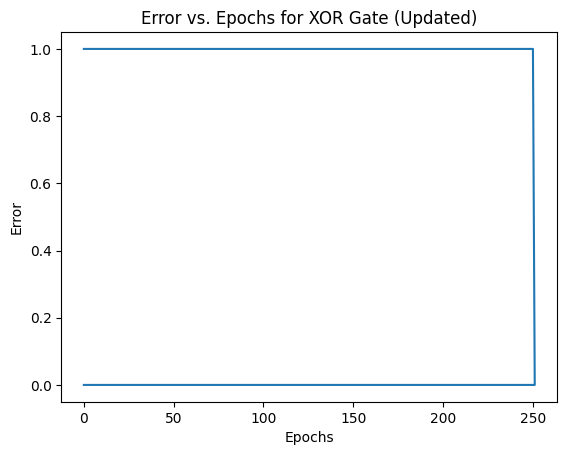

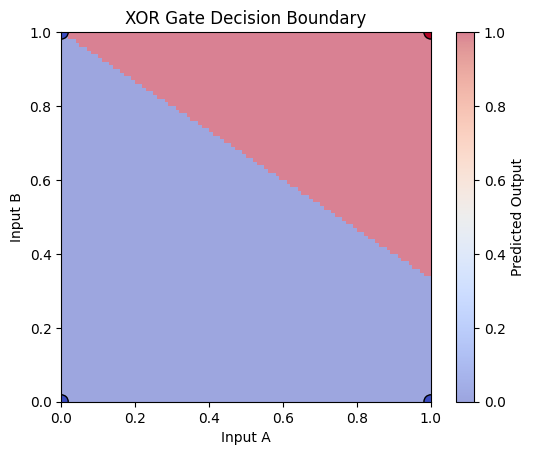

Accuracy: 100.00%
Accuracy using Matrix Pseudo-Inverse: 71.43%
Accuracy using Perceptron Learning: 100.00%
Input: [0 0], Predicted Output: 0.0080
Input: [0 1], Predicted Output: 0.0551
Input: [1 0], Predicted Output: 0.0553
Input: [1 1], Predicted Output: 0.9333


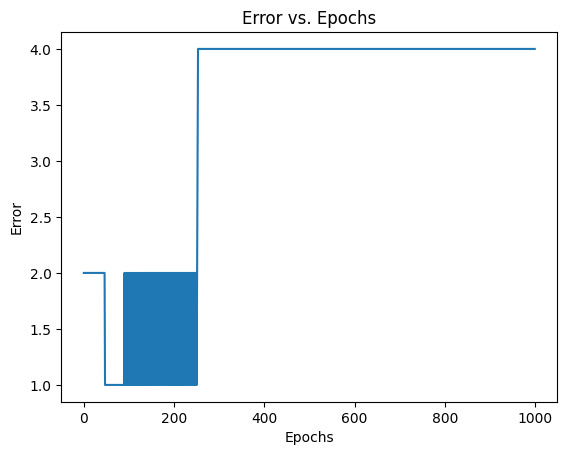

In [1]:
# bl.en.u4cse21109
# Mukil LD

import numpy as np
import matplotlib.pyplot as plt

data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

W = np.array([10, 0.2, -0.75])
learning_rate = 0.05

errors = {'Bi-Polar Step': [], 'Sigmoid': [], 'ReLU': []}
epochs = {'Bi-Polar Step': [], 'Sigmoid': [], 'ReLU': []}

max_epochs = 1000

def bi_polar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

activation_functions = {'Bi-Polar Step': bi_polar_step, 'Sigmoid': sigmoid, 'ReLU': relu}

for activation_function in activation_functions:
    W = np.array([10, 0.2, -0.75])
    num_iterations = None
    for epoch in range(max_epochs):
        error = 0
        for i in range(len(data)):
            inputs = np.insert(data[i], 0, 1)
            predicted = activation_functions[activation_function](np.dot(W, inputs))
            delta = labels[i] - predicted
            W += learning_rate * delta * inputs
            error += delta ** 2
        errors[activation_function].append(error)
        epochs[activation_function].append(epoch)
        if error == 0:
            num_iterations = epoch + 1
            break
    if num_iterations is None:
        num_iterations = max_epochs
    print(f"{activation_function} Converged after {num_iterations} epochs")

for activation_function in activation_functions:
    plt.plot(epochs[activation_function], errors[activation_function], label=activation_function)

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs. Epochs for Different Activation Functions")
plt.legend()
plt.show()

for activation_function in activation_functions:
    print(f"Final Weights for {activation_function}:")
    print("W0:", W[0])
    print("W1:", W[1])
    print("W2:", W[2])

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []
initial_weights = np.array([10, 0.2, -0.75])

for learning_rate in learning_rates:
    W = np.copy(initial_weights)
    num_iterations = None
    for epoch in range(max_epochs):
        error = 0
        for i in range(len(data)):
            inputs = np.insert(data[i], 0, 1)
            predicted = np.dot(W, inputs)
            delta = labels[i] - predicted
            W += learning_rate * delta * inputs
            error += delta ** 2
        if error == 0:
            num_iterations = epoch + 1
            break
    if num_iterations is None:
        num_iterations = max_epochs
    iterations.append(num_iterations)

plt.plot(learning_rates, iterations, marker='o', linestyle='-')
plt.xlabel("Learning Rate")
plt.ylabel("Number of Iterations to Converge")
plt.title("Convergence vs. Learning Rate")
plt.grid(True)
plt.show()

errors = []
epochs = []
max_epochs = 1000

for epoch in range(max_epochs):
    error = 0
    for i in range(len(data)):
        inputs = np.insert(data[i], 0, 1)
        predicted = np.heaviside(np.dot(W, inputs), 0)
        delta = labels[i] - predicted
        W += learning_rate * delta * inputs
        error += abs(delta)
    errors.append(error)
    epochs.append(epoch)
    if error == 0:
        print(f"Converged after {epoch + 1} epochs")
        break

plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs. Epochs for XOR Gate")
plt.show()

print("Final Weights:")
print("W0:", W[0])
print("W1:", W[1])
print("W2:", W[2])

max_epochs = 500
learning_rate = 0.05

for epoch in range(max_epochs):
    error = 0
    for i in range(len(data)):
        inputs = np.insert(data[i], 0, 1)
        predicted = np.heaviside(np.dot(W, inputs), 0)
        delta = labels[i] - predicted
        W += learning_rate * delta * inputs
        error += abs(delta)
    errors.append(error)
    epochs.append(epoch)
    if error == 0:
        print(f"Converged after {epoch + 1} epochs (Updated)")
        break

plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs. Epochs for XOR Gate (Updated)")
plt.show()

x_range = np.linspace(0, 1, 100)
y_range = np.linspace(0, 1, 100)
decision_boundary = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        inputs = np.array([1, x_range[i], y_range[j]])
        predicted = np.heaviside(np.dot(W, inputs), 0)
        decision_boundary[i, j] = predicted

plt.imshow(decision_boundary, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Predicted Output')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', edgecolors='k', marker='o', s=100)
plt.xlabel("Input A")
plt.ylabel("Input B")
plt.title("XOR Gate Decision Boundary")
plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
weights = np.random.rand(5)
learning_rate = 0.01

data = [
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1]
]

X = np.array([row[:-1] for row in data])
y = np.array([row[-1] for row in data])

max_epochs = 1000
for epoch in range(max_epochs):
    error = 0
    for i in range(len(data)):
        inputs = np.insert(X[i], 0, 1)
        predicted = sigmoid(np.dot(weights, inputs))
        delta = y[i] - predicted
        weights += learning_rate * delta * inputs
        error += delta ** 2
    if error == 0:
        print(f"Converged after {epoch + 1} epochs")
        break

predictions = [1 if sigmoid(np.dot(weights, np.insert(x, 0, 1))) >= 0.5 else 0 for x in X]
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

X = np.array([row[:-1] for row in data])
y = np.array([row[-1] for row in data])
X = np.insert(X, 0, 1, axis=1)
weights_pseudo_inverse = np.linalg.pinv(X).dot(y)
weights_perceptron = np.random.rand(X.shape[1])
learning_rate = 0.01
max_epochs = 1000

for epoch in range(max_epochs):
    error = 0
    for i in range(X.shape[0]):
        predicted = sigmoid(X[i].dot(weights_perceptron))
        delta = y[i] - predicted
        weights_perceptron += learning_rate * delta * X[i]
        error += delta ** 2
    if error == 0:
        print(f"Converged after {epoch + 1} epochs (Perceptron)")
        break

predictions_pseudo_inverse = (sigmoid(X.dot(weights_pseudo_inverse)) >= 0.5).astype(int)
predictions_perceptron = (sigmoid(X.dot(weights_perceptron)) >= 0.5).astype(int)

accuracy_pseudo_inverse = np.mean(predictions_pseudo_inverse == y)
accuracy_perceptron = np.mean(predictions_perceptron == y)

print(f"Accuracy using Matrix Pseudo-Inverse: {accuracy_pseudo_inverse * 100:.2f}%")
print(f"Accuracy using Perceptron Learning: {accuracy_perceptron * 100:.2f}%")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [0], [0], [1]])

input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.05

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

epochs = 10000

for epoch in range(epochs):
    hidden_layer_input = np.dot(data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    error = labels - output_layer_output

    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += data.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)

for i in range(len(test_data)):
    print(f"Input: {test_data[i]}, Predicted Output: {predicted_output[i][0]:.4f}")

data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

W = np.array([10, 0.2, -0.75])
learning_rate = 0.05

errors = []
epochs = []

max_epochs = 1000

def step_activation(x):
    return 1 if x >= 0 else 0

for epoch in range(max_epochs):
    error = 0
    for i in range(len(data)):
        inputs = np.insert(data[i], 0, 1)
        predicted = step_activation(np.dot(W, inputs))
        delta = labels[i] - predicted
        W += learning_rate * delta * inputs
        error += delta ** 2
    errors.append(error)
    epochs.append(epoch)
    if error == 0:
        print(f"Converged after {epoch + 1} epochs")
        break

plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs. Epochs")
plt.show()